# Phase 1
This phase establishes a robust evaluation protocol by expanding beyond Macro F1 to include precision-recall curves and confusion matrices, providing deeper insight into class-specific errors. We will also conduct baseline experiments on the full set of original classes and perform ablation studies to isolate the impact of text preprocessing choices on model performance.

## Ablation studies
This notebook will define a "Experiment Runner" to test three key ablations:
1. Stop Words: Impact of removing common English words.
2. N-grams: Comparison between Unigrams ($1, 1$) and Bigrams ($1, 2$).
3. Vocabulary Limits: Impact of restricting the model to the most frequent 1,000 words.

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
SEED = 42

# Custom modules
from src.preprocessing import get_preprocessed_data
from src.evaluate import run_full_evaluation

# 1. Load Data
train_df, val_df, test_df, id2label, label2id = get_preprocessed_data()

# Preparation of text and targets
X_train, y_clarity_train, y_evasion_train = train_df["interview_answer"], train_df["clarity_label"], train_df["evasion_label"]
X_val, y_clarity_val, y_evasion_val = val_df["interview_answer"], val_df["clarity_label"], val_df["evasion_label"]


Running Ablation: Baseline


/home/alumno/py313ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alumno/py313ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alumno/py313ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: 

Confusion matrices saved to: figures/confusion_matrices_Baseline.png


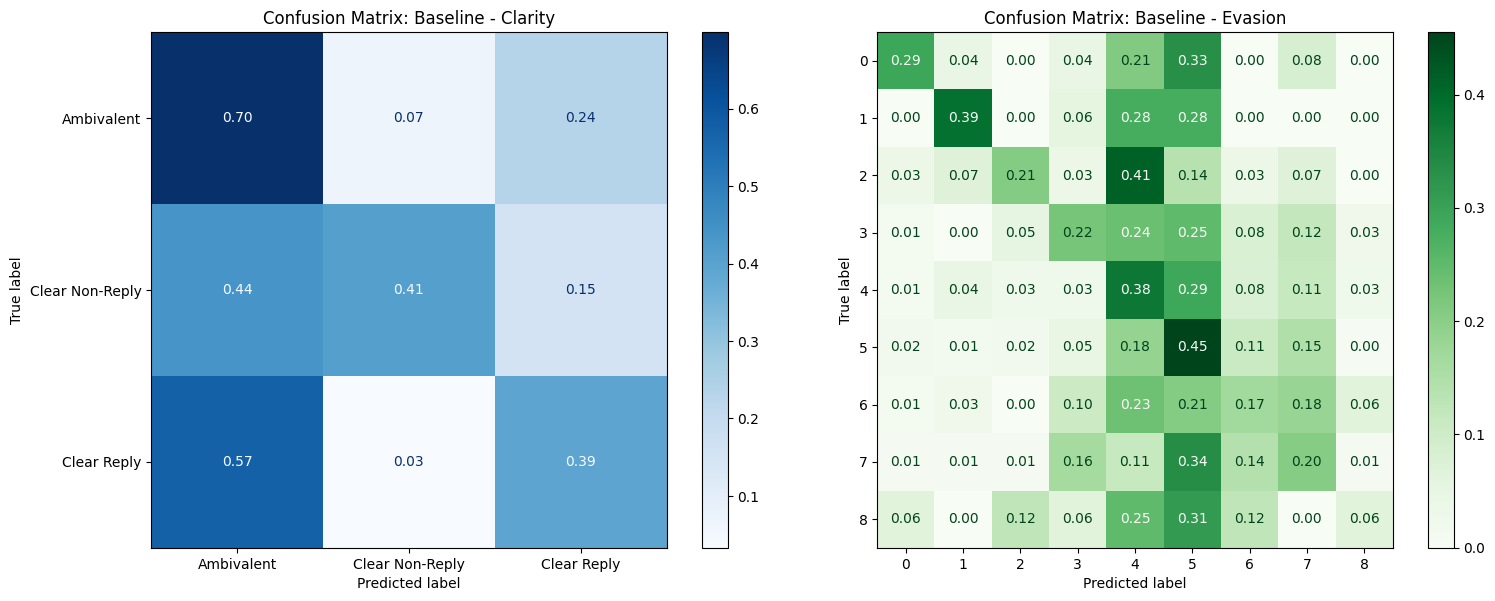


Running Ablation: No_Stop_Words


/home/alumno/py313ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alumno/py313ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Confusion matrices saved to: figures/confusion_matrices_No_Stop_Words.png


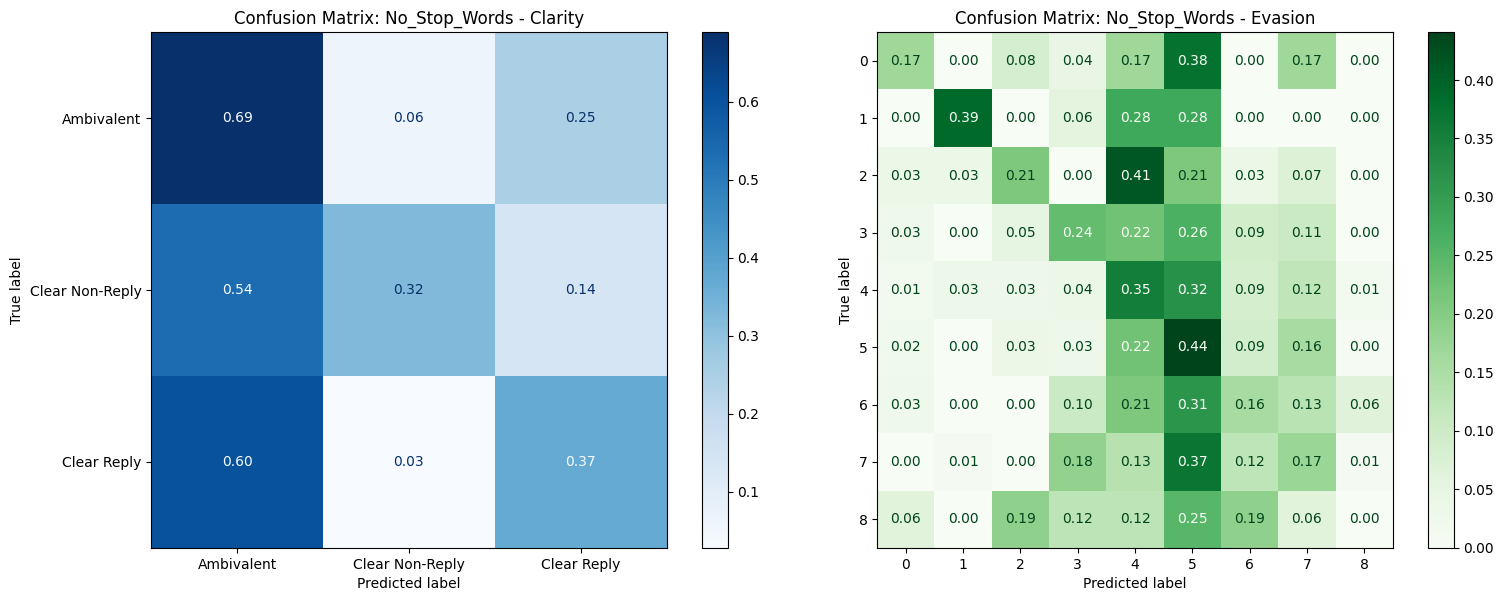


Running Ablation: Bigrams


/home/alumno/py313ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alumno/py313ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Confusion matrices saved to: figures/confusion_matrices_Bigrams.png


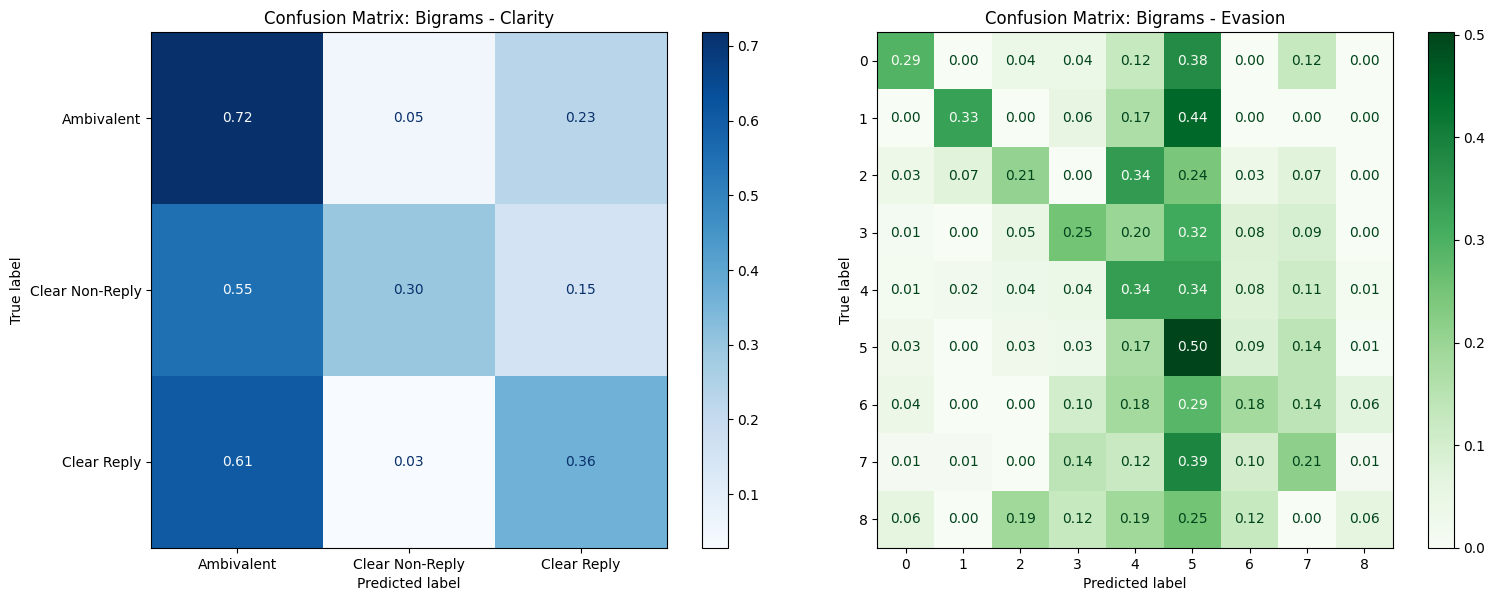


Running Ablation: Limited_Vocab


/home/alumno/py313ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alumno/py313ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Confusion matrices saved to: figures/confusion_matrices_Limited_Vocab.png


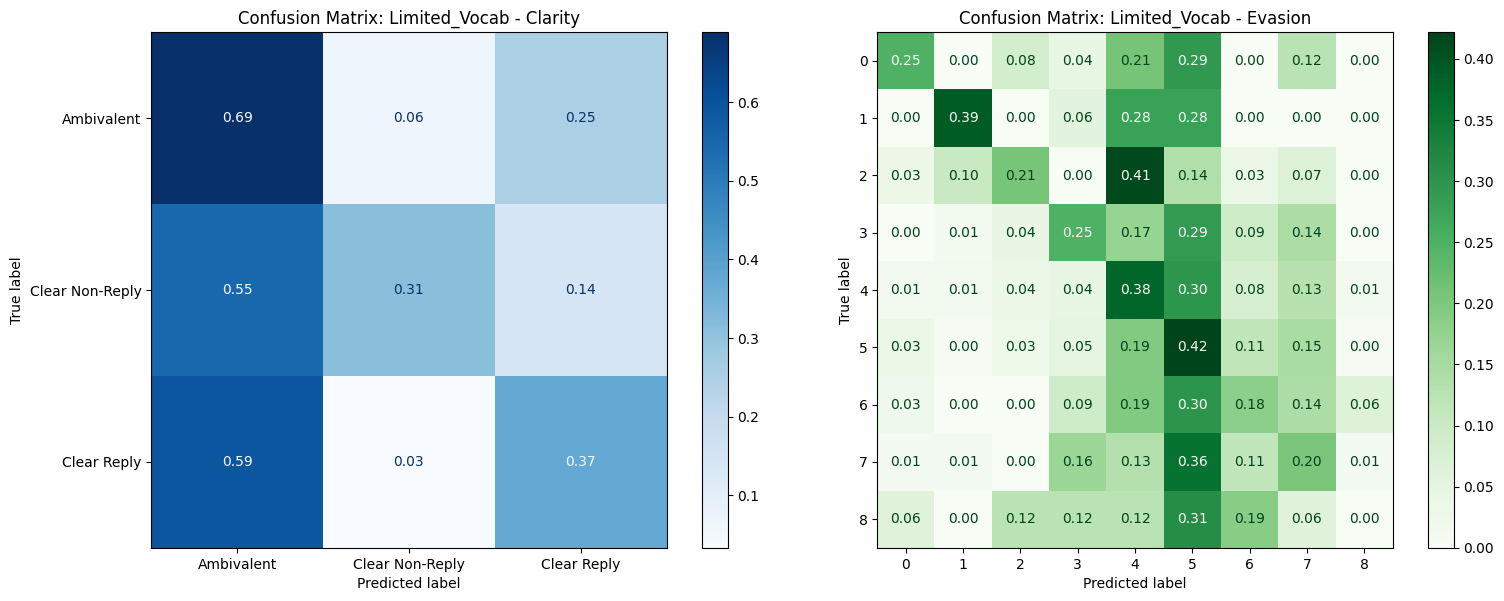


Running Ablation: Binary_Presence


/home/alumno/py313ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alumno/py313ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Confusion matrices saved to: figures/confusion_matrices_Binary_Presence.png


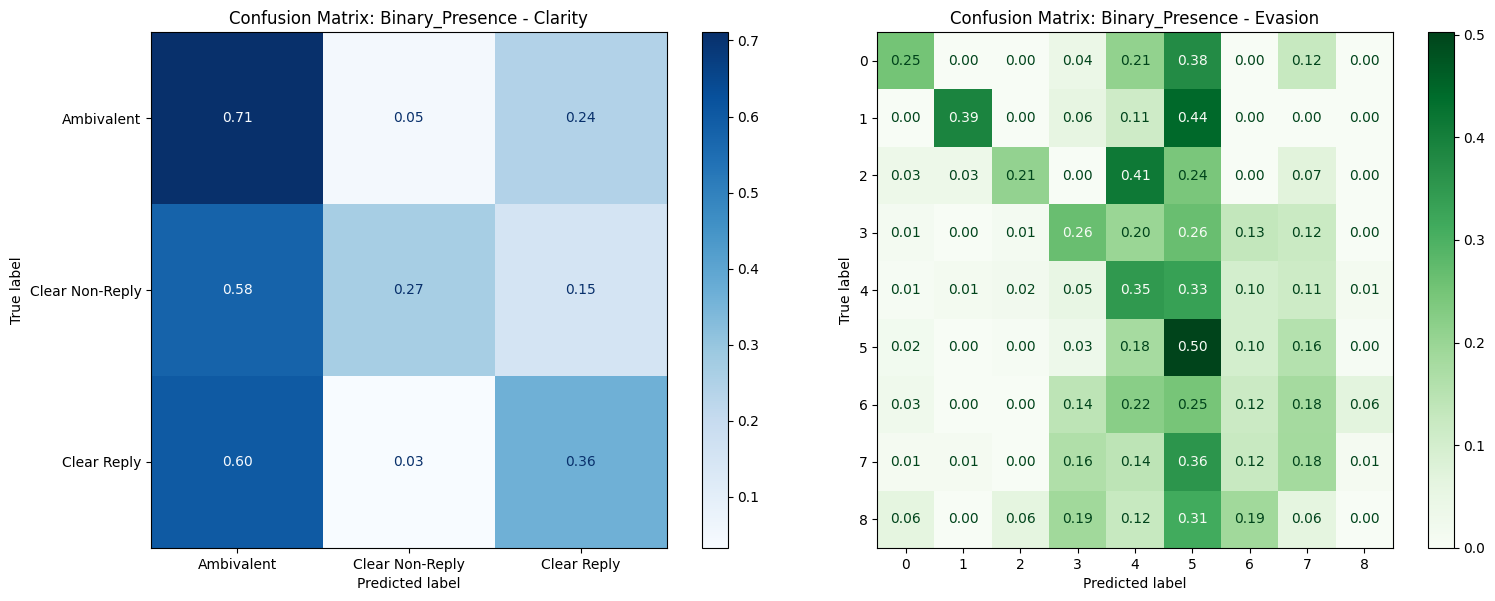


Running Ablation: Rare_Word_Removal


/home/alumno/py313ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alumno/py313ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Confusion matrices saved to: figures/confusion_matrices_Rare_Word_Removal.png


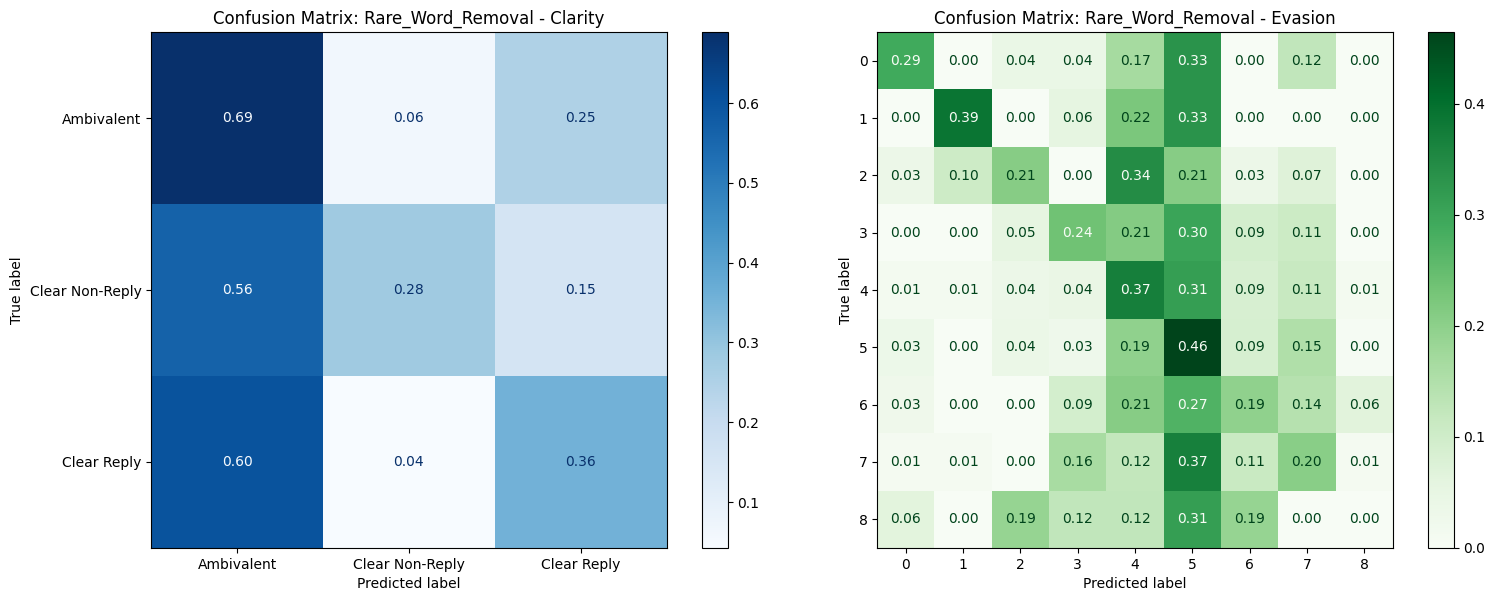


Running Ablation: Character_Ngrams


/home/alumno/py313ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/alumno/py313ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alumno/py313ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: 

Confusion matrices saved to: figures/confusion_matrices_Character_Ngrams.png


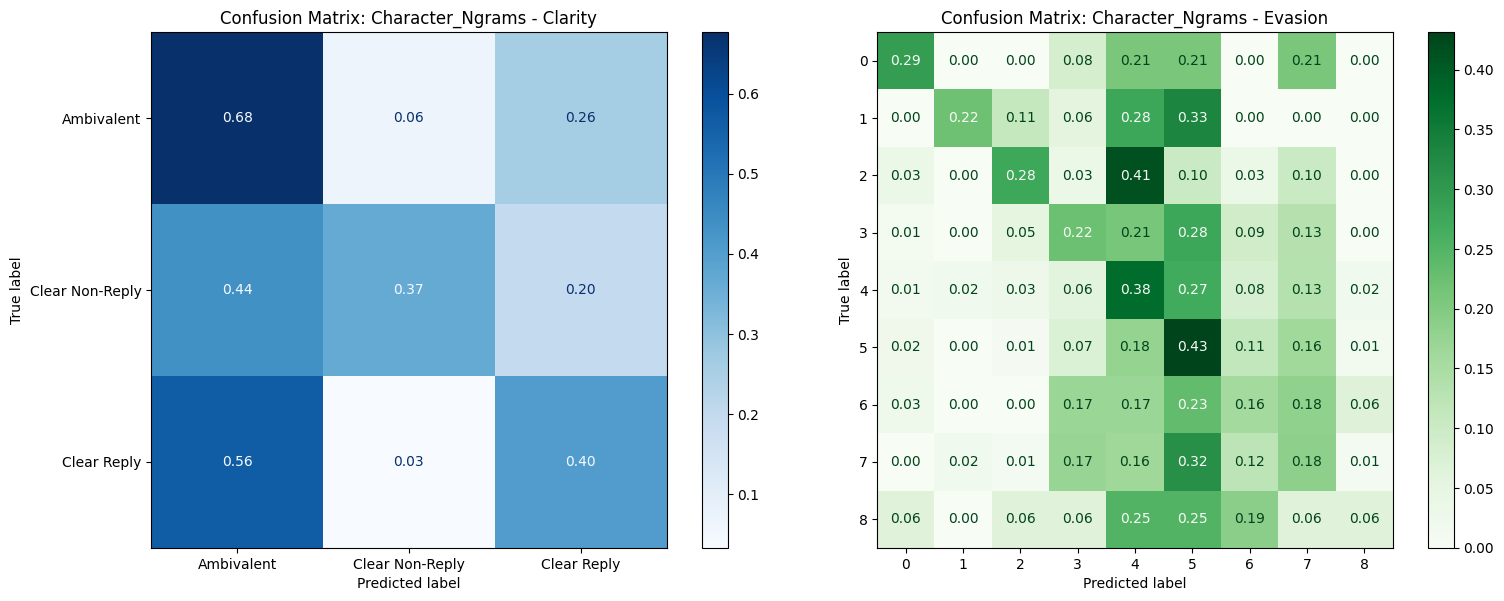

In [2]:
ablations = {
    "Baseline": {"stop_words": None, "ngram_range": (1, 1), "max_features": None},
    "No_Stop_Words": {"stop_words": 'english', "ngram_range": (1, 1), "max_features": None},
    "Bigrams": {"stop_words": 'english', "ngram_range": (1, 2), "max_features": None},
    "Limited_Vocab": {"stop_words": 'english', "ngram_range": (1, 2), "max_features": 5000},
    "Binary_Presence": {"binary": True, "stop_words": 'english', "ngram_range": (1, 1)},
    "Rare_Word_Removal": {"min_df": 5, "stop_words": 'english', "ngram_range": (1, 2)},
    "Character_Ngrams": {"analyzer": 'char', "ngram_range": (3, 5), "max_features": 5000}
}


all_results = []

for name, params in ablations.items():
    print(f"\n{'='*20}\nRunning Ablation: {name}\n{'='*20}")
    
    # Vectorizer con params de ablation
    tfidf = CountVectorizer(**params)
    
    X_train_vec = tfidf.fit_transform(X_train)
    X_val_vec   = tfidf.transform(X_val)
    
    # Modelos
    clf_clarity = LogisticRegression(
        max_iter=1000,
        multi_class="multinomial",
        random_state=SEED
    )
    
    clf_evasion = LogisticRegression(
        max_iter=1000,
        multi_class="multinomial",
        random_state=SEED
    )
    
    clf_clarity.fit(X_train_vec, y_clarity_train)
    clf_evasion.fit(X_train_vec, y_evasion_train)
    
    res = run_full_evaluation(
        clf_clarity=clf_clarity,
        clf_evasion=clf_evasion,
        X=X_val_vec,
        y_clarity=y_clarity_val,
        y_evasion=y_evasion_val,
        title=name
    )
    
    all_results.append({
        "Ablation": name,
        "Clarity_F1": res["clarity"]["global_metrics"]["f1_macro"],
        "Evasion_F1": res["evasion"]["global_metrics"]["f1_macro"]
    })

In [3]:
comparison_df = pd.DataFrame(all_results)
print("\nFinal Comparison Table:")
print(comparison_df.to_markdown(index=False))


Final Comparison Table:
| Ablation          |   Clarity_F1 |   Evasion_F1 |
|:------------------|-------------:|-------------:|
| Baseline          |     0.507119 |     0.26798  |
| No_Stop_Words     |     0.471702 |     0.246077 |
| Bigrams           |     0.473305 |     0.276706 |
| Limited_Vocab     |     0.468583 |     0.260691 |
| Binary_Presence   |     0.461422 |     0.271648 |
| Rare_Word_Removal |     0.450827 |     0.271499 |
| Character_Ngrams  |     0.490175 |     0.260827 |
